In [2]:
import csv, datetime, pandas as pd

# Read data for January 7

In [7]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-07-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(3509, 12)


Finding out unique sources

In [8]:
unique_src = data.src.unique()
print(len(unique_src))

1000


Unique ip sources frequency table

In [9]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

          Unique src  Count
467    185.107.94.10    571
983     93.115.26.45    326
159  121.231.140.225    314
686  221.229.204.101     86
316     164.52.7.173     84


In [10]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   3181
0       amun    328


Grouping by timestamp

In [13]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-06 06:51:07      1
1 2018-01-06 06:52:27      1
2 2018-01-06 06:52:47      1
3 2018-01-06 06:53:17      2
4 2018-01-06 06:53:57      1


In [14]:
time_series = data.groupby(df.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0    0.0     69
1    1.0     69
2    2.0     68
3    3.0     77
4    4.0     72
5    5.0     72
6    6.0     75
7    7.0     65
8    8.0     98
9    9.0    101
10  10.0    106
11  11.0    113
12  12.0     77
13  13.0     97
14  14.0    111
15  15.0     87
16  16.0     89
17  17.0     83
18  18.0     91
19  19.0    102
20  20.0     83
21  21.0     62
22  22.0     68
23  23.0     80


Bar chart of time stamp count

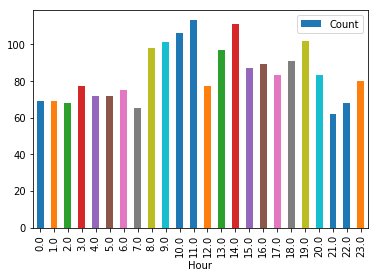

In [16]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')